Beta: [ 0.04852855 -0.12190704]
Beta Std Error: [0.08272405 0.51328218]
Beta Covariance: [[ 0.01215132 -0.06683224]
 [-0.06683224  0.46781282]]
Residual Variance: 0.5631709763250657
Inverse Condition #: 0.06924248413648264
Reason(s) for Halting:
  Sum of squares convergence


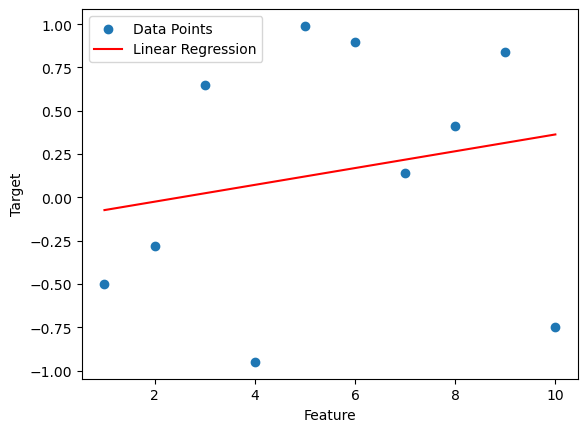

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#odr function from scipy package used to perform ODR regression
from scipy import odr
import random as r #importing random values I assume?

#Create a sample feature array and a target array
feature = np.array(np.arange(1,11))

#shuffle created array
np.random.shuffle(feature) #why is it necessary to shuffle the array?

#create a target array of random numbers
target = np.array([0.65, -0.75, 0.90, -0.5, 0.14, 0.84, 0.99, -0.95, 0.41, -0.28])

def target_function(p, x): 
    m, c = p
    return m*x + c

#model fit
odr_model = odr.Model(target_function)

#create a data object using sample data created
data = odr.Data(feature, target)

#set ODR with the model and data
ordinal_distance_reg = odr.ODR(data, odr_model, beta0=[0.2, 1.])

#run the regression
out = ordinal_distance_reg.run()

#print the results
out.pprint()

#Plotting this figure 
#NOTE: Doesn't use point weight
x_fit = np.linspace(min(feature), max(feature), 100)
y_fit = target_function(out.beta, x_fit)

plt.scatter(feature, target, label='Data Points')
plt.plot(x_fit, y_fit, label='Linear Regression', color='red')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()